#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [22]:
import numpy as np
import matplotlib.pyplot as plt

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

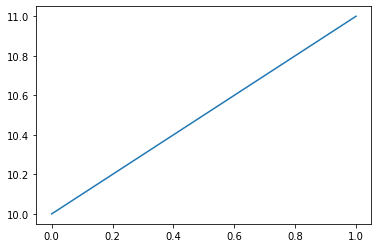

In [23]:
## Write your code here
w0,w1 = 10,1
x = np.linspace(0,1,1000)
y = w1*x + w0
plt.plot(x,y)
plt.show()

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

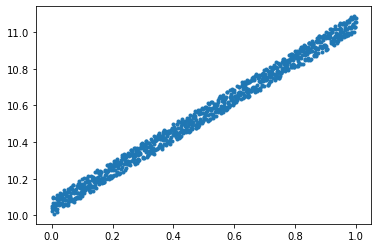

In [24]:
## Write your code here
rand_num = np.random.random(y.shape)
y_corr = y + 0.1*rand_num
plt.plot(x,y_corr,'.')
plt.show()

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

In [25]:
a = np.array([1,6,7])
b = np.array([2,3,4])
np.outer(a,b)

array([[ 2,  3,  4],
       [12, 18, 24],
       [14, 21, 28]])

Optimal Value of w1 is : 1.0780780780780779


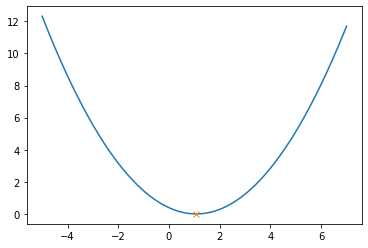

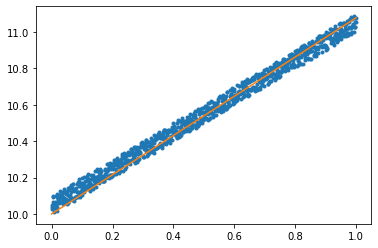

In [26]:
## Write your code here
def optimal_sol(x,y,w0,search_space):
    y_pred = np.outer(search_space,x) + w0
    error = np.sum((y_pred - y)**2,axis = 1)/y.shape[0]
    index = np.argmin(error)
    return error,index

w0 = 10
search_space = np.linspace(-5,7,1000)
error,min_index = optimal_sol(x,y_corr,w0,search_space)
y_opt = search_space[min_index]*x + w0
print(f'Optimal Value of w1 is : {search_space[min_index]}')
plt.plot(search_space,error)
plt.plot(search_space[min_index],error[min_index],'x')
plt.show()
plt.plot(x,y_corr,'.')
plt.plot(x,y_opt)
plt.show()

**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

Optimal Value of w1 is : 1.1245149404210937


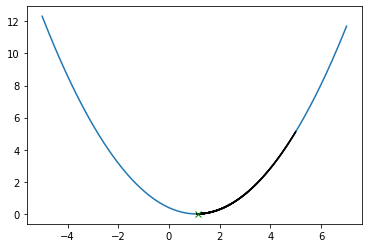

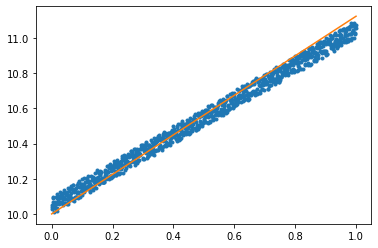

In [27]:
## Write your code here
def grad(x,y,y_pred):
    return (-2 * np.sum((y-y_pred) * x))/y.shape[0]

def loss(y,y_pred):
    return np.sum((y_pred - y)**2)/y.shape[0]

plt.figure()
plt.plot(search_space,error)
w1 = 5
w0 = 10
epsilon = 1e-5
lr = 0.01

diff_in_errors = 1000000
iter = 0
while iter < 1000 and diff_in_errors > epsilon:
    new_w1 = w1
    old_y_pred = w1 * x + w0
    # print(grad(x,y_corr,old_y_pred))
    new_w1 = new_w1 - lr * grad(x,y_corr,old_y_pred)
    new_y_pred = new_w1 * x + w0
    diff_in_errors = np.abs(loss(y_corr,new_y_pred) - loss(y_corr,old_y_pred))
    plt.plot([w1,new_w1],[loss(y_corr,old_y_pred),loss(y_corr,new_y_pred)],color = 'k')
    w1 = new_w1
    iter += 1
    # break

print(f'Optimal Value of w1 is : {w1}')
y_opt = w1 * x + w0
plt.plot(w1,loss(y_corr,y_opt),'x',color='g')
plt.show()
plt.figure()
plt.plot(x,y_corr,'.')
plt.plot(x,y_opt)
plt.show()

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

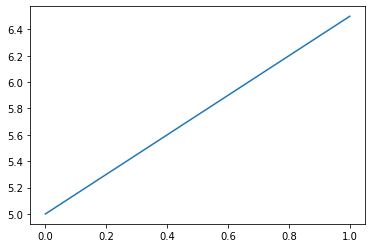

In [28]:
## Write your code here
x = np.linspace(0,1,1000)
w0,w1 = 5,1.5
y = w1 * x + w0
plt.plot(x,y)
plt.show()

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

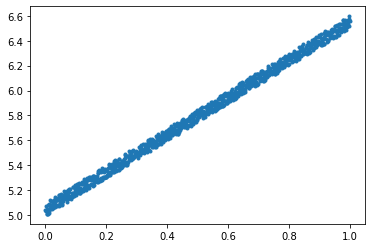

In [29]:
## Write your code here
rand_num = np.random.random(y.shape)
y_corr = y + 0.1 * rand_num
plt.plot(x,y_corr,'.')
plt.show()

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

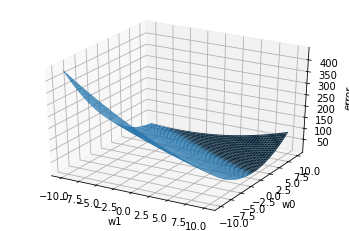

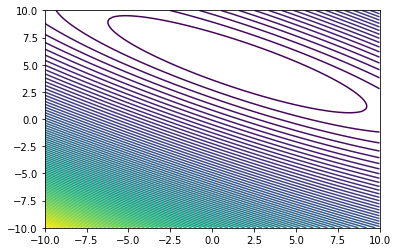

In [30]:
## Write your code here
w0 = np.linspace(-10,10,100)
w1 = np.linspace(-10,10,100)
mesh_w0,mesh_w1 = np.meshgrid(w0,w1)

def loss(w1,w0,x,y):
    error = np.zeros(w1.shape)
    for a,b in zip(x,y):
        y_pred = w1 * a + w0
        error += (y_pred - b)**2
    return error/x.shape[0]

error = loss(mesh_w1,mesh_w0,x,y_corr)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(mesh_w1, mesh_w0, error)
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('error');
plt.show()

plt.figure()
plt.contour(mesh_w1, mesh_w0, error,100)
plt.show()

**Gradient Descent to find optimal Values**

Optimal Value of w0 and w1 is w0 = 5.029484136355913 and w1 = 1.5347003507873118


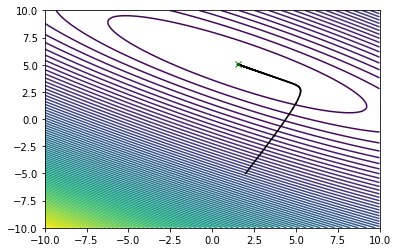

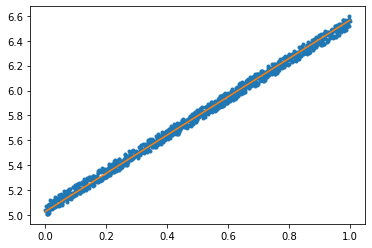

In [31]:
## Write your code here
w1 = 2
w0 = -5
lr = 0.1
epsilon = 1e-6

def grad_w1(x,y,y_pred):
    return (-2 * np.sum((y-y_pred) * x))/y.shape[0]

def grad_w0(x,y,y_pred):
    return (-2 * np.sum(y-y_pred))/y.shape[0]

def loss(y,y_pred):
    return np.sum((y_pred - y)**2)/y.shape[0]

plt.figure()
plt.contour(mesh_w1,mesh_w0, error,100)

diff_in_errors = 1000000
iter = 0
while iter < 1000 and diff_in_errors > epsilon:
    new_w0 = w0
    new_w1 = w1
    old_y_pred = w1 * x + w0
    # print(grad(x,y_corr,old_y_pred))
    new_w1 = new_w1 - lr * grad_w1(x,y_corr,old_y_pred)
    new_w0 =  new_w0 - lr * grad_w0(x,y_corr,old_y_pred)
    new_y_pred = new_w1 * x + new_w0
    diff_in_errors = np.abs(loss(y,new_y_pred) - loss(y,old_y_pred))
    plt.plot([w1,new_w1],[w0,new_w0],color = 'k')
    w1 = new_w1
    w0 = new_w0
    iter += 1
    # break

print(f'Optimal Value of w0 and w1 is w0 = {w0} and w1 = {w1}')
plt.plot(w1,w0,'x',color='g')
y_opt = w1 * x + w0
plt.show()
# plt.plot(w1,loss(y_corr,y_opt),'x',color='g')
# plt.show()
plt.figure()
plt.plot(x,y_corr,'.')
plt.plot(x,y_opt)
plt.show()

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

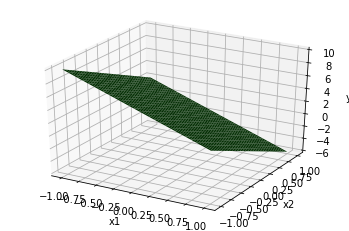

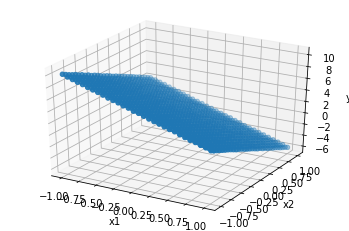

In [32]:
## Write your code here
x1 = np.linspace(-1,1,30)
x2 = np.linspace(-1,1,30)

w0,w1,w2 = 2,-4,-4

y= w0 + w1 * x1 + w2 * x2

X1,X2 = np.meshgrid(x1,x2)
Y = w0 + w1 * X1 + w2 * X2
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, color = 'g')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');
plt.show()

# Adding a noisy plane
rand_noise_plane = np.random.uniform(0,1,Y.shape)
Y_corr = Y + 0.1 * rand_noise_plane

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y_corr,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');


**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

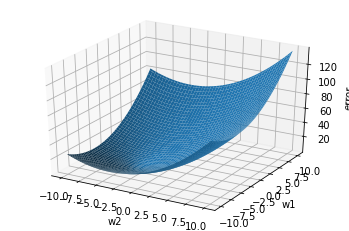

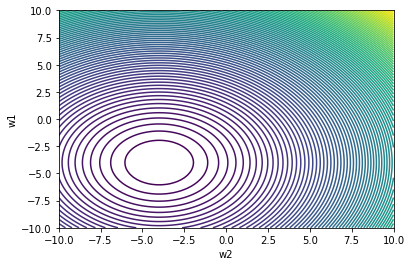

In [33]:
## Write your code here
x1 = X1.flatten()
x2 = X2.flatten()
y_corr = Y_corr.flatten()

search_w1 = np.linspace(-10,10,100)
search_w2 = np.linspace(-10,10,100)

W2,W1 = np.meshgrid(search_w2,search_w1)

def loss(w2,w1,w0,x1,x2,y):

    error = np.zeros(w1.shape)
    for a,b,c in zip(x1,x2,y):
        y_pred = w0 + w1 * a + w2 * b
        error += (y_pred - c)**2

    return error/x1.shape[0]

error = loss(W2,W1,w0,x1,x2,y_corr)

plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W2, W1, error)
ax.set_xlabel('w2')
ax.set_ylabel('w1')
ax.set_zlabel('error');
plt.show()

plt.figure()
plt.contour(W2, W1, error,100)
plt.xlabel('w2')
plt.ylabel('w1')
plt.show()

**Prediction using Gradient Descent**

Optimal Value of w1 and w2 is w1 = -3.9997592580265104 and w2 = -3.9926522699841107


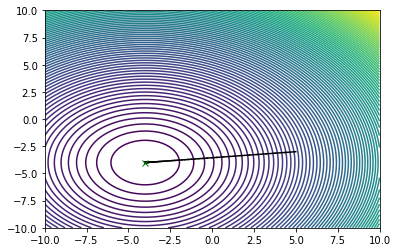

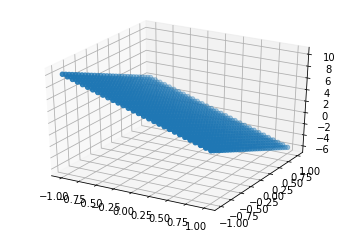

In [34]:
## Write your code here
w2 = 5
w1 = -3
lr = 0.1 
epsilon = 1e-6
w0 = 2

def grad_w2(x2,y,y_pred):
    return (-2 * np.sum((y-y_pred) * x2))/y.shape[0]

def grad_w1(x1,y,y_pred):
    return (-2 * np.sum((y-y_pred) * x1))/y.shape[0]

def loss(y,y_pred):
    return np.sum((y_pred - y)**2)/y.shape[0]

plt.figure()
plt.contour(W2, W1, error,100)

diff_in_errors = 1000000
iter = 0
while iter < 10000 and diff_in_errors > epsilon:
    new_w1 = w1
    new_w2 = w2
    old_y_pred = w0 + w1 * x1 + w2 * x2
    new_w1 = new_w1 - lr * grad_w1(x1,y_corr,old_y_pred)
    new_w2 =  new_w2 - lr * grad_w2(x2,y_corr,old_y_pred)
    new_y_pred = w0 + new_w1 * x1 + new_w2 * x2
    diff_in_errors = np.abs(loss(y_corr,new_y_pred) - loss(y_corr,old_y_pred))
    plt.plot([w2,new_w2],[w1,new_w1],color = 'k')
    w1 = new_w1
    w2 = new_w2
    iter += 1

print(f'Optimal Value of w1 and w2 is w1 = {w1} and w2 = {w2}')
plt.plot(w2,w1,'x',color='g')
plt.show()

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, Y_corr,'.')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

y_opt = w0 + w1*X1 + w2*X2

ax = plt.axes(projection='3d')
ax.scatter3D(X1, X2, y_opt,'.')
plt.show()

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[ 4.05113343e+00]
 [-3.00006012e+00]
 [ 9.98736792e-01]
 [ 2.00357498e+00]
 [ 8.00147673e+00]
 [-1.40017087e-03]]
[[ 4.05080792e+00]
 [-2.99083852e+00]
 [ 9.99421245e-01]
 [ 2.00092608e+00]
 [ 7.98942134e+00]
 [-2.02359004e-03]]


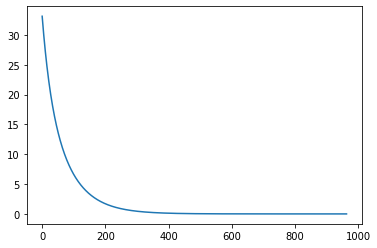

In [35]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + lr * (2/x.shape[1]) * (x @ (y - (x.T @ w_old)))
    return w

  def error(self,w,y,x):
    return np.mean((y-x.T @ w)**2)

  def mat_inv(self,y,x_aug):
    return np.linalg.pinv((x_aug @ x_aug.T)) @ x_aug @ y
    
  # By Gradien descent

  def Regression_grad_des(self,x,y,lr):
    epsilon = 1e-6
    error = []
    for i in range(1000):
      if i == 0:
        w = np.random.uniform(-1,1,(x_aug.shape[0],1))
        w_old = w
        w_pred = self.grad_update(w_old,lr,y,x_aug)
      else:
        w_old = w_pred
        w_pred = self.grad_update(w_old,lr,y,x_aug)
  
      error.append(self.error(w_pred,y,x_aug))
      dev = np.abs(self.error(w_pred,y,x_aug) - self.error(w_old,y,x_aug))

      if dev <= 1e-6:
        break

    return w_pred,error


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w = np.array([[4],[-3],[1],[2],[8],[0]])
print(w.shape)

## Augment the Input
x_aug = np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print(y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# By Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
plt.show()

#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [36]:
## Write your code here
import math
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('salary_pred_data.csv')
X = data.drop(['Salary'],axis =1)
Y = data['Salary']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state=4)
x_train,x_test,y_train,y_test = x_train.T,x_test.T,y_train.T,y_test.T
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
x_train = np.concatenate((np.ones((1,x_train.shape[1])), x_train),axis=0)
x_test = np.concatenate((np.ones((1,x_test.shape[1])), x_test),axis=0)
y_train = np.asarray(y_train).T
y_test = np.asarray(y_test).T
reg=regression()
# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
w_pred_matrix = reg.mat_inv(y_train,x_train)
error_train = reg.error(w_pred_matrix,y_train,x_train)/((np.max(y_train)-np.mean(y_train))**2)
error_test = reg.error(w_pred_matrix,y_test,x_test)/((np.max(y_test)-np.mean(y_test))**2)
y_pred = x_test.T @ w_pred_matrix
print('Normalized training error = ',error_train,'\n')
print('Normalized testing error = ',error_test,'\n')
print('predicted salary = ',y_pred[0:3],'\n')
print('actual salary = ',y_test[0:3])
print("\nWeights with Matrix Inversion")

Normalized training error =  2.785366539722834e-28 

Normalized testing error =  3.4968574342306293e-28 

predicted salary =  [58744. 31490. 34464.] 

actual salary =  [58744 31490 34464]

Weights with Matrix Inversion


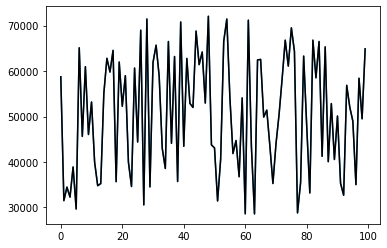

In [37]:
plt.plot(y_test)
plt.plot(y_pred,'k')
plt.show()

[0.e+00 2.e+03 1.e+02 2.e+00 3.e+02 5.e+03]


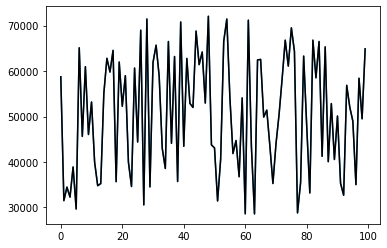

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train.T,y_train)

final_weights = reg.coef_
print(final_weights)

y_pred = reg.predict(x_test.T)

plt.plot(y_test)
plt.plot(y_pred,'k')
plt.show()
